<a href="https://colab.research.google.com/github/Farah7402/Book1/blob/main/Book_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [2]:
!git init

Initialized empty Git repository in /content/.git/


In [11]:
! git clone https://github.com/Farah7402/Book1.git

Cloning into 'Book1'...


In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras import utils as np_utils 
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train,y_valid) = y_train[5000:], y_train[:5000]

print('x_train =', x_train.shape)
print('x_valid =', x_valid.shape)
print('x_test =', x_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train = (45000, 32, 32, 3)
x_valid = (5000, 32, 32, 3)
x_test = (10000, 32, 32, 3)


In [ ]:
#normalize

mean = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis = (0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test =  tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True,vertical_flip=True)
datagen.fit(x_train)

In [ ]:
base_hidden_units =32
weight_decay=1e-4
model = Sequential()

model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(base_hidden_units * 2, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(base_hidden_units*4, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(base_hidden_units*4, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center =False,
    featurewise_std_normalization = False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(x_train)

In [ ]:
batch_size = 64
epochs =125

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.125epochs.hdf5', verbose=1,save_best_only=True)

optimizer = tf.keras.optimizers.Adam(lr = 0.0005, decay = 1e-6)


model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), callbacks=[checkpointer], steps_per_epoch = x_train.shape[0] // batch_size, epochs=epochs, verbose=2, validation_data=(x_valid, y_valid))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/125
703/703 - 54s - loss: 0.7483 - accuracy: 0.7557 - val_loss: 0.5796 - val_accuracy: 0.8174

Epoch 00001: val_loss improved from inf to 0.57960, saving model to model.125epochs.hdf5
Epoch 2/125
703/703 - 31s - loss: 0.7119 - accuracy: 0.7660 - val_loss: 0.6688 - val_accuracy: 0.7986

Epoch 00002: val_loss did not improve from 0.57960
Epoch 3/125
703/703 - 31s - loss: 0.6915 - accuracy: 0.7747 - val_loss: 0.7590 - val_accuracy: 0.7738

Epoch 00003: val_loss did not improve from 0.57960
Epoch 4/125
703/703 - 31s - loss: 0.6731 - accuracy: 0.7826 - val_loss: 0.5837 - val_accuracy: 0.8208

Epoch 00004: val_loss did not improve from 0.57960
Epoch 5/125
703/703 - 31s - loss: 0.6758 - accuracy: 0.7817 - val_loss: 0.6234 - val_accuracy: 0.8098

Epoch 00005: val_loss did not improve from 0.57960
Epoch 6/125
703/703 - 31s - loss: 0.6547 - accuracy: 0.7897 - val_loss: 0.5361 - val_accuracy: 0.8352

Epoch 00006: val_loss improved from 0.57960 to 0.53612, saving model to model.125epochs.h

In [ ]:
scores = model.evaluate(x_test, y_test, batch_size =128, verbose=1)
print('\nTest result: %.3f loss:%.3f' %(scores[1]*100,scores[0]))

79/79 [==============================] - 1s 13ms/step - loss: 0.4804 - accuracy: 0.8777

Test result: 87.770 loss:0.480


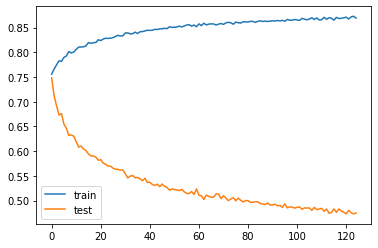

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['loss'], label='test')
pyplot.legend()
pyplot.show()

In [12]:
! git commit -a -m "first commit"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@cbc03bd6b8d7.(none)')


In [13]:
! git config --global user.email "farahjabeen024@gmail.com"
! git config --global user.name "Farah7402"

In [14]:
! git config --list

user.email=farahjabeen024@gmail.com
user.name=Farah7402
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true


In [16]:
! git commit -a -m "first commit"

On branch master

Initial commit

Untracked files:
	-2DSnake/
	.config/
	Book1/
	sample_data/

nothing added to commit but untracked files present
